Завдання 1. Порівняння рандомізованого та детермінованого QuickSort

Розмір масиву: 10000
   Рандомізований QuickSort: 0.0259 секунд
   Детермінований QuickSort: 0.0223 секунд

Розмір масиву: 50000
   Рандомізований QuickSort: 0.1549 секунд
   Детермінований QuickSort: 0.1442 секунд

Розмір масиву: 100000
   Рандомізований QuickSort: 0.3436 секунд
   Детермінований QuickSort: 0.3686 секунд

Розмір масиву: 500000
   Рандомізований QuickSort: 2.9628 секунд
   Детермінований QuickSort: 2.9761 секунд



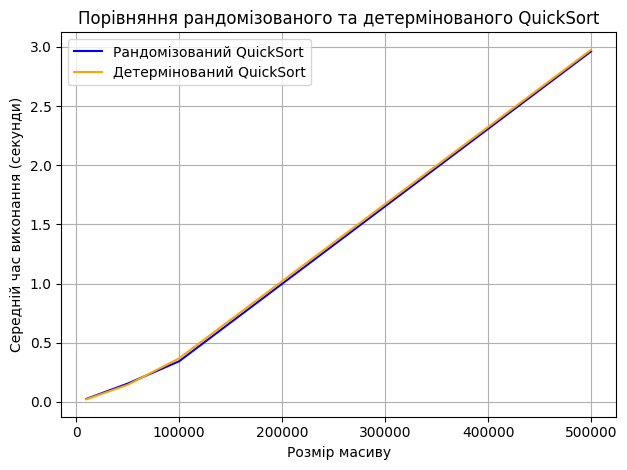

In [31]:
import random
import time
import matplotlib.pyplot as plt

# Детермінований QuickSort (опорний елемент — середній)
def deterministic_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return deterministic_quick_sort(left) + middle + deterministic_quick_sort(right)

# Рандомізований QuickSort (опорний елемент — випадковий)
def randomized_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return randomized_quick_sort(left) + middle + randomized_quick_sort(right)

# Функція для вимірювання середнього часу з сортуванням 5 разів
def measure_average_time(sort_func, arr, runs=5):
    times = []
    for _ in range(runs):
        copied_arr = arr.copy()
        start = time.time()
        sort_func(copied_arr)
        end = time.time()
        times.append(end - start)
    return sum(times) / len(times)

# Розміри масивів
sizes = [10_000, 50_000, 100_000, 500_000]
randomized_times = []
deterministic_times = []

# Вимірювання та виведення результатів
for size in sizes:
    test_array = [random.randint(0, 1_000_000) for _ in range(size)]
    r_time = measure_average_time(randomized_quick_sort, test_array)
    d_time = measure_average_time(deterministic_quick_sort, test_array)
    randomized_times.append(r_time)
    deterministic_times.append(d_time)

    print(f"Розмір масиву: {size}")
    print(f"   Рандомізований QuickSort: {r_time:.4f} секунд")
    print(f"   Детермінований QuickSort: {d_time:.4f} секунд\n")

# Побудова графіка
plt.plot(sizes, randomized_times, label="Рандомізований QuickSort", color='blue')
plt.plot(sizes, deterministic_times, label="Детермінований QuickSort", color='orange')
plt.xlabel("Розмір масиву")
plt.ylabel("Середній час виконання (секунди)")
plt.title("Порівняння рандомізованого та детермінованого QuickSort")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Завдання 2. Складання розкладу занять за допомогою жадібного алгоритму

In [33]:
# Реалізуйємо клас Teacher із заданими атрибутами
class Teacher:
    def __init__(self, first_name, last_name, age, email, can_teach_subjects):
        self.first_name = first_name
        self.last_name = last_name
        self.age = age
        self.email = email
        self.can_teach_subjects = set(can_teach_subjects)
        self.assigned_subjects = set()

    def __repr__(self):
        return f"{self.first_name} {self.last_name}"

# функція використання жадібного алгоритму для призначення викладачів на предмети
def create_schedule(subjects, teachers):
    uncovered = set(subjects)
    schedule = []

    while uncovered:
        best_teacher = None
        max_cover = 0

        for teacher in teachers:
            can_cover = len(teacher.can_teach_subjects & uncovered)
            if can_cover > max_cover:
                max_cover = can_cover
                best_teacher = teacher
            elif can_cover == max_cover and can_cover > 0:
                if best_teacher and teacher.age < best_teacher.age:
                    best_teacher = teacher

        if not best_teacher:
            return None  # Не можна покрити всі предмети

        assigned = best_teacher.can_teach_subjects & uncovered
        best_teacher.assigned_subjects = assigned
        schedule.append(best_teacher)
        uncovered -= assigned
        teachers.remove(best_teacher)

    return schedule

# Демонстрація виконання
if __name__ == '__main__':
    subjects = {'Математика', 'Фізика', 'Хімія', 'Інформатика', 'Біологія'}

    teachers = [
        Teacher("Олександр", "Іваненко", 45, "o.ivanenko@example.com", {'Математика', 'Фізика'}),
        Teacher("Марія", "Петренко", 38, "m.petrenko@example.com", {'Хімія'}),
        Teacher("Сергій", "Коваленко", 50, "s.kovalenko@example.com", {'Інформатика', 'Математика'}),
        Teacher("Наталія", "Шевченко", 29, "n.shevchenko@example.com", {'Біологія', 'Хімія'}),
        Teacher("Дмитро", "Бондаренко", 35, "d.bondarenko@example.com", {'Фізика', 'Інформатика'}),
        Teacher("Олена", "Гриценко", 42, "o.grytsenko@example.com", {'Біологія'})
    ]

    schedule = create_schedule(subjects, teachers)

    if schedule:
        print("Розклад занять:")
        for teacher in schedule:
            print(f"{teacher.first_name} {teacher.last_name}, {teacher.age} років, email: {teacher.email}")
            print(f"   Викладає предмети: {', '.join(teacher.assigned_subjects)}\n")
    else:
        print("Неможливо покрити всі предмети наявними викладачами.")

Розклад занять:
Наталія Шевченко, 29 років, email: n.shevchenko@example.com
   Викладає предмети: Біологія, Хімія

Дмитро Бондаренко, 35 років, email: d.bondarenko@example.com
   Викладає предмети: Інформатика, Фізика

Олександр Іваненко, 45 років, email: o.ivanenko@example.com
   Викладає предмети: Математика

